#

## _Resume Parsing_ 
### Abstract

This notebook demonstrates the process of extracting text from a scanned resume image using image processing techniques and Optical Character Recognition (OCR). This version was done by the owner of the repository, **Khouri A. Ouadoud**, and represents a typical way to highlight what users can expect from the defined functions and methods, making it a bit more clear that it covers practical aspects of each step. The pipeline includes the following steps:

1. **Image Loading**: The resume image is loaded using the OpenCV library to prepare it for processing.
   
2. **Frame Detection**: A custom `ResumeParser` class is used to detect and extract the various text boxes (or frames) present in the resume. These boxes are filtered and sorted based on their area, with larger text regions processed first.

3. **Frame Cropping**: The largest detected text box is cropped from the image for further processing. The text lines within this cropped region are also identified.

4. **Line Display**: Each text line in the cropped region is extracted and displayed individually for visualization and verification.

5. **Text Extraction**: The `pytesseract` library is employed to extract text from each of the identified text lines. The extracted text is stored in a list.

6. **Result Compilation**: Finally, all extracted text is compiled and displayed, forming the content of the resume in a structured format.

**NOTE:** This method provides an efficient way to process and extract meaningful information from scanned documents like resumes by combining image processing and OCR. For more details on the the steps mentionned in this pipeline, please refer to the `documentation` directory included in the present project repository. 





### **First Pipline**: Image Processing

In [1]:
# Import necessary libraries
# numpy - for array manipulation and mathematical operations
# cv2 - OpenCV library for image processing
# imagproc_pkg - Custom image processing package
# pytesseract - OCR library for extracting text from images
import numpy, cv2
from imagproc_pkg import *
import pytesseract


In [2]:
# Load the resume image using OpenCV
# "resume2.png" is the file name of the image
# resume() is a function that returns the file path of the resume image
img = cv2.imread(resume("resume2.png"))


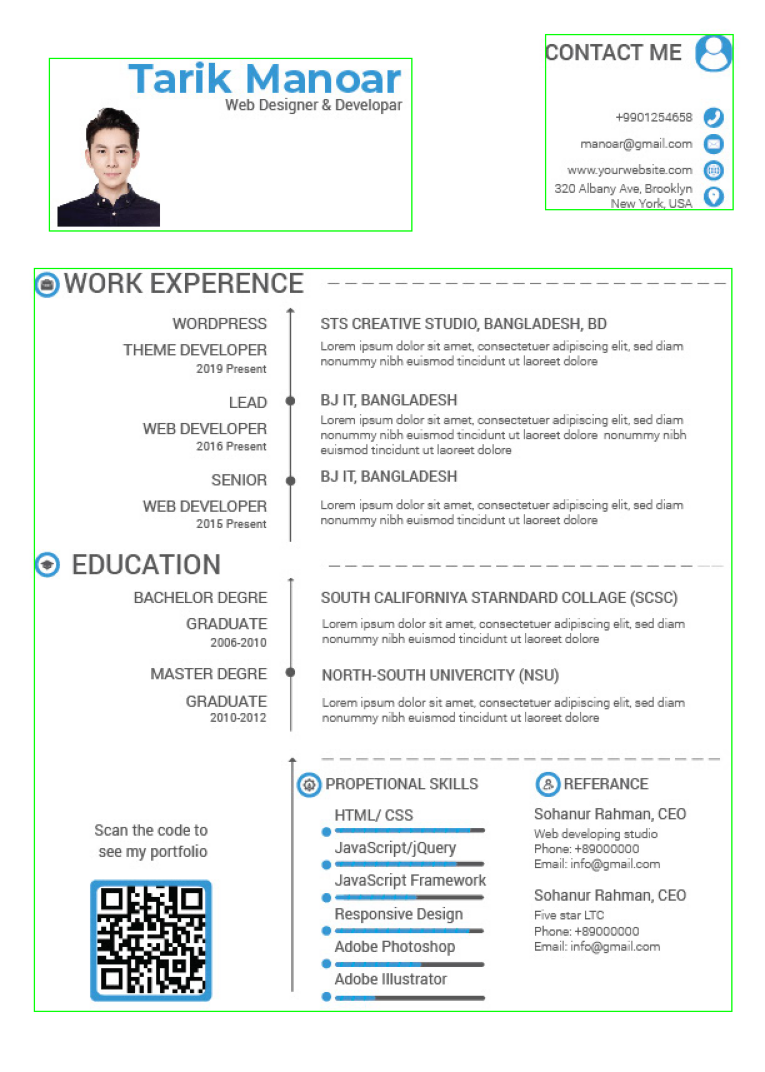

In [3]:
# Create an instance of the ResumeParser class from the imagproc_pkg
# This object will be used to process the resume image
parser = ResumeParser()

# Scan the frames (text boxes) in the image
# margin = 25 and max_area = 30000 are parameters to control box merging and size filtering
# The function returns the image and a list of detected boxes
_, boxes = parser.ScanFrames(img, margin=25, max_area=30000)


In [4]:
# Calculate the area for each detected box (width * height)
# Sort the boxes based on their area in descending order and store the indexes in frame_indexes
# This will help us process the largest boxes (most likely text regions) first
frame_indexes = [(box[1][0] - box[0][0]) * (box[1][1] - box[0][1]) for box in boxes]
frame_indexes = sorted(range(len(frame_indexes)), key=lambda idx: frame_indexes[idx], reverse=True)


First FLAG


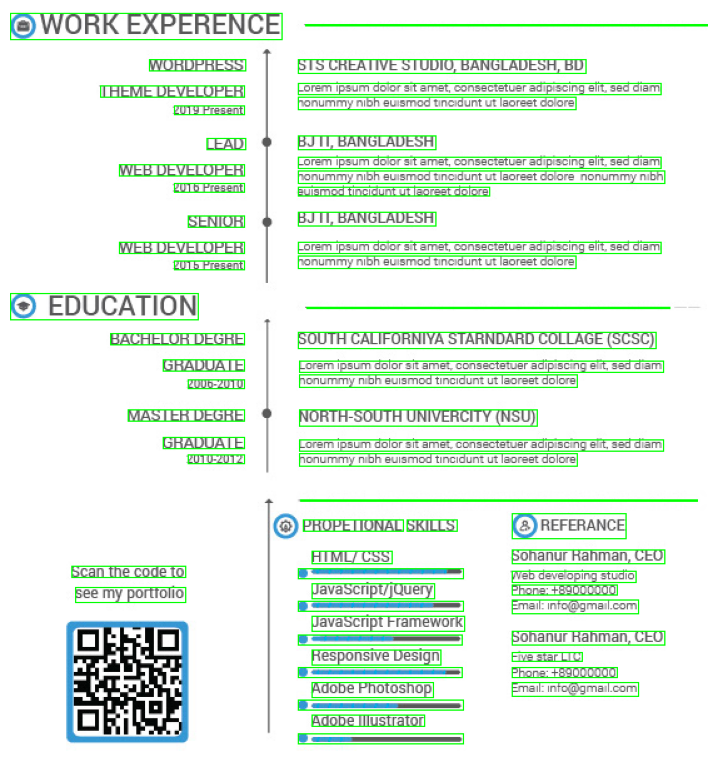

In [5]:
# Crop the largest frame (box with the highest area) from the image for further processing
# We pass the largest box index (frame_indexes[0]) and set padding to 0
# The function returns the cropped image and lines (detected text lines)
cropped_img, lines = parser.CroppeImage(img, boxes, frame_indexes[0], padding=0)


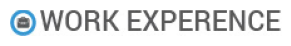

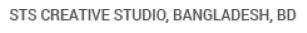

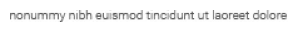

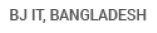

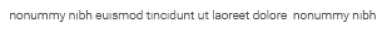

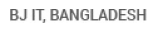

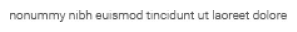

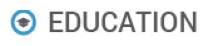

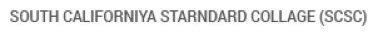

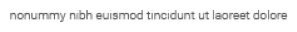

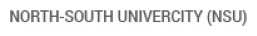

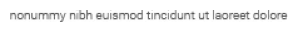

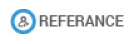

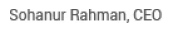

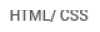

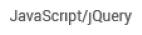

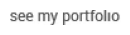

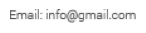

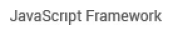

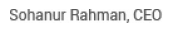

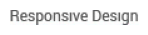

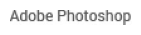

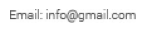

In [6]:
# Loop through each line detected within the cropped image
# For each line, retrieve the corresponding cropped image region and display it using the display function
for idx in range(len(lines)):
    img_ = retrieve_cropped(cropped_img, lines, idx)
    display(img=img_)


In [7]:
# Initialize an empty list to store the extracted text from each line
text_list = []

# Loop through each line again
# For each line, retrieve the corresponding cropped image region
# Use pytesseract to perform OCR and extract text from the image
# config='--psm 7' tells Tesseract to treat the image as a single line of text
for idx in range(len(lines)):
    img_ = retrieve_cropped(cropped_img, lines, idx)
    text_str = pytesseract.image_to_string(img_, config=r' --psm 7')
    
    # Append the extracted text (without the last two characters) to the text_list
    text_list.append([text_str[:-2]])

# Display the final list of extracted text from all the lines
text_list


[['@) WORK EXPERENCE'],
 ['I I I I I I I I I I I I I I I I I I I C—O'],
 ['WORDPRESS'],
 ['SIS CREATIVE STUDIO, BANGLADESH, BU'],
 ['LOrem ipsum color sit arnet, CONMSectetuer aciprscing elit, sec diam'],
 ['TREME DEVELOPER'],
 ['nonummy nibh euismod tincidunt ut laoreet dolore'],
 ['/U19 Present'],
 ['DJ tL BANGLADESH'],
 ['| es)'],
 ['LOrem ipsum color sit armet, consectetuer aciprscing elit, sec diam'],
 ['WEB DEVELOPER'],
 ['nonummy nibh euismod tincidunt ut laoreet Golore nonummy nibn'],
 ['/U10 Present'],
 ['SuUISToOd tinciourt ut eoreet colore'],
 ['DJ tL BANGLADESH'],
 ['SENIOR'],
 ['WEB DEVELOPER'],
 ['LOrem ipsum color sit armet, CONSectetuer Sciprscing elit, sec diam'],
 ['nonummy nibh eulsmoc tincidunt ut laoreet colore'],
 ['JUS Present'],
 [') EDUCATION'],
 ['ee I I I I I I I I I I I I I I I I I I I CCC'],
 ['SOUTH CALIFORNIYA STARNDARD COLLAGE (SCSC)'],
 ['BACHELOR DEGREE'],
 ['(55 ADUATE'],
 ['orem ipsum color sit amet, consectetuer acipiscing eit, seq diam'],
 ['nonumm